# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import linregress
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

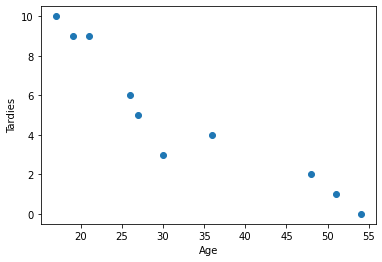

In [9]:
# Your code here.

plt.scatter(student_data.Age,student_data.Tardies)
plt.xlabel("Age")
plt.ylabel("Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
#Entre mas avanza la edad los retardos disminuyen, puede haber una correlación lineal negativa entre ambas variables 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
# Your response here.
cov_mat=student_data.cov()
covarianza=cov_mat.loc["Age","Tardies"]
corr_mat=student_data.corr()
correlacion=corr_mat.loc["Age","Tardies"]
print("covarianza=",covarianza)
print("correlación=",correlacion)
#La covarianza es negativa por lo que la relación entre variables es inversa mientras que la correlación es muy cercana a -1 
#por lo que hay una fuerte relación lineal entre las varibales y es negativa 

covarianza= -45.56666666666666
correlación= -0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [18]:
# Your response here.
slope, intercept, r_value, p_value, std_err = linregress(student_data.Age, student_data.Tardies)
slope, intercept, r_value, p_value, std_err

(-0.2428207709159808,
 12.888803363135768,
 -0.9391626886887121,
 5.56665383455343e-05,
 0.03139728816158607)

Plot your regression model on your scatter plot.

Text(0, 0.5, 'Tardies')

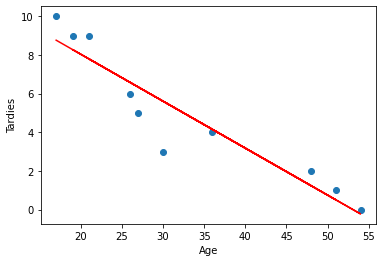

In [27]:
# Your code here.
y=[slope*x+intercept for x in student_data.Age]
plt.scatter(student_data.Age,student_data.Tardies)
plt.plot(student_data.Age,y,"r")
plt.xlabel("Age")
plt.ylabel("Tardies")


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
#Podemos decir que si hay una relación lineal fuerte entre ambas variables por el valor de la correlación cercano a -1, 
#En este caso especifico si encontramos que la edad afecta en los retardos, entre mas edad menos retardos, sin embargo no podemos asegurar 
#que una sea causante de la otra

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [38]:
# Import any libraries you may need & the data
from statsmodels.formula.api import ols
import statsmodels.api as sm
vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [35]:
# Your response here. 
vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year","CO2 Emission Grams/Mile"]].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
#Las variables que mas determinanlas emisiones de CO2 son Fuel Barrels/Year, Combined MPG y Fuel Cost/Year 
#y la que menos lo determina es el año

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [42]:
# Your response here. 
X = sm.add_constant(vehicles[[ "Fuel Barrels/Year" , "Combined MPG","Fuel Cost/Year"]]) 
Y = vehicles["CO2 Emission Grams/Mile"]

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 5.932e+05
Date:                     Fri, 28 Jan 2022   Prob (F-statistic):               0.00
Time:                             22:05:04   Log-Likelihood:            -1.5235e+05
No. Observations:                    35952   AIC:                         3.047e+05
Df Residuals:                        35948   BIC:                         3.047e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#Fuel Barrels/Year , Combined MPG, Fuel Cost/Year son las variables mas importantes para el modelo por estar 
#mas correlacionadas con la emisión de CO2, pero los coeficientes de Fuel Barrels y Combined son mas grandes que el de Fuel Cost 
#que esta mas cerca de cero, como la r cuadrada es cercana a 1 podemos decir que esas variables explacan con un porcentaje de 98% a la emision de CO2
#por lo que es un buen modelo

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [4]:
# Your code here. 
Fiestas= pd.DataFrame({'invitados': [1,3,4,6,8,9,11,14], 'asistentes': [1,2,4,4,5,7,8,13]})
Fiestas

,invitados,asistentes
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [5]:
# Your code here.
slope, intercept, r_value, p_value, std_err = linregress(Fiestas.invitados, Fiestas.asistentes)
slope, intercept, r_value, p_value, std_err

(0.8484848484848485,
 -0.43939393939393945,
 0.9652303546573691,
 0.00010236374464090686,
 0.09380896778286217)

Text(0, 0.5, 'Asistentes')

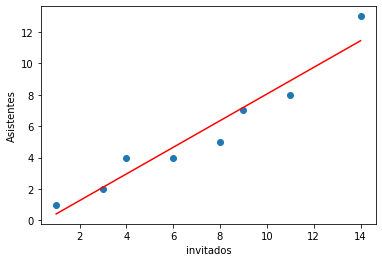

In [11]:
y=[slope*x+intercept for x in Fiestas.invitados]
plt.scatter(Fiestas.invitados,Fiestas.asistentes)
plt.plot(Fiesta.invitados,y,"r")
plt.xlabel("invitados")
plt.ylabel("Asistentes")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
#El valor de r si es muy cercano a uno por lo que hay una fuerte correlación lineal positiva entre ambas variables y el 
#p-value es muy pequeño por lo que podemos rechazar el hecho de que la pendiente sea cero 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [12]:
# Your response here. 
Fiestas1=Fiestas[Fiestas.invitados<14]
slope, intercept, r_value, p_value, std_err = linregress(Fiestas1.invitados, Fiestas1.asistentes)
slope, intercept, r_value, p_value, std_err

(0.6842105263157895,
 0.32330827067669166,
 0.971278116825086,
 0.0002644056885656864,
 0.07496206665031292)

Text(0, 0.5, 'Asistentes')

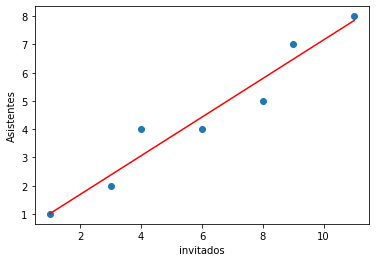

In [14]:
y=[slope*x+intercept for x in Fiestas1.invitados]
plt.scatter(Fiestas1.invitados,Fiestas1.asistentes)
plt.plot(Fiestas1.invitados,y,"r")
plt.xlabel("invitados")
plt.ylabel("Asistentes")

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#el valor de r aumento es decir hay mas relación lineal entre las variables, la recta se acerca mejor a 
#los puntos y cambiaron los valores de la pendiente y la ordenada al origen 